# Intern Performance Prediction Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("3.intern_performance_prediction.csv")

In [4]:
df.shape

(1500, 34)

In [5]:
df.head()

,intern_id,department,internship_duration_weeks,attendance_rate,meeting_participation_rate,total_tasks_assigned,tasks_completed_on_time,tasks_completed_late,tasks_incomplete,task_completion_rate,...,initiative_feedback,average_feedback_score,final_performance_score,performance_tier,success_probability,will_convert_to_ft,recommendation_score,weekly_progress_trend,engagement_score,learning_velocity
0,INT_00001,Research,8,85.9,69.0,18,13,12,-7,138.9,...,9.4,8.1,71.1,High,0.701,False,0.495,5.0;8.2;18.5;24.9;28.9;34.2;38.9;47.3,52.1,1.06
1,INT_00002,Data Science,16,77.4,64.0,19,14,3,2,89.5,...,4.5,7.1,57.1,Medium,0.783,True,0.442,0.0;9.1;15.9;23.0;32.4;39.9;48.5;50.5;55.6;67....,44.9,0.41
2,INT_00003,Research,8,79.9,90.9,32,22,19,-9,128.1,...,10.0,8.6,67.0,Medium,0.762,True,0.493,13.6;23.0;27.4;37.4;42.5;52.9;64.3;69.9,55.5,0.92
3,INT_00004,Engineering,16,83.9,77.8,17,8,5,4,76.5,...,6.7,7.5,58.7,Medium,0.645,True,0.443,5.7;13.0;19.5;27.8;42.7;45.1;55.2;58.3;64.9;76...,54.1,0.49
4,INT_00005,Business,16,77.0,85.9,15,10,9,-4,126.7,...,4.9,6.3,56.5,Medium,0.683,False,0.476,6.2;20.5;30.5;38.8;48.1;55.8;62.3;70.9;81.6;88...,53.8,0.42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   intern_id                   1500 non-null   object 
 1   department                  1500 non-null   object 
 2   internship_duration_weeks   1500 non-null   int64  
 3   attendance_rate             1500 non-null   float64
 4   meeting_participation_rate  1500 non-null   float64
 5   total_tasks_assigned        1500 non-null   int64  
 6   tasks_completed_on_time     1500 non-null   int64  
 7   tasks_completed_late        1500 non-null   int64  
 8   tasks_incomplete            1500 non-null   int64  
 9   task_completion_rate        1500 non-null   float64
 10  on_time_completion_rate     1500 non-null   float64
 11  average_task_quality        1500 non-null   float64
 12  task_complexity_score       1500 non-null   float64
 13  code_commits                1500 

In [7]:
df.describe()

,internship_duration_weeks,attendance_rate,meeting_participation_rate,total_tasks_assigned,tasks_completed_on_time,tasks_completed_late,tasks_incomplete,task_completion_rate,on_time_completion_rate,average_task_quality,...,communication_feedback,problem_solving_feedback,teamwork_feedback,initiative_feedback,average_feedback_score,final_performance_score,success_probability,recommendation_score,engagement_score,learning_velocity
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,12.096000,79.899400,67.040133,27.772000,18.037333,8.768000,0.966667,96.166067,64.820533,6.987867,...,7.405133,7.441133,7.463000,7.435067,7.444333,63.064867,0.621044,0.502763,49.919133,0.646013
std,3.232814,12.073094,14.703796,7.463499,6.591983,5.788423,6.813651,23.445139,14.807883,1.402647,...,1.517505,1.440029,1.435994,1.527929,0.714755,4.479533,0.172671,0.085741,5.051697,0.236687
min,8.000000,36.400000,16.600000,15.000000,3.000000,0.000000,-25.000000,21.100000,10.800000,2.000000,...,1.500000,2.600000,2.800000,2.500000,4.800000,48.100000,0.027000,0.204000,32.300000,0.060000
25%,8.000000,72.475000,57.700000,21.000000,13.000000,4.000000,-3.000000,80.000000,54.500000,6.100000,...,6.400000,6.500000,6.500000,6.400000,7.000000,60.000000,0.512000,0.446000,46.600000,0.470000
50%,12.000000,82.000000,68.500000,28.000000,17.000000,8.000000,1.000000,95.200000,66.700000,7.100000,...,7.400000,7.500000,7.500000,7.500000,7.500000,63.100000,0.636000,0.509000,50.400000,0.600000
75%,16.000000,89.300000,78.225000,34.000000,23.000000,12.000000,5.000000,112.500000,75.900000,8.100000,...,8.500000,8.500000,8.500000,8.600000,8.000000,66.200000,0.743000,0.566250,53.500000,0.780000
max,16.000000,99.500000,97.100000,40.000000,36.000000,33.000000,29.000000,175.000000,96.400000,9.900000,...,10.000000,10.000000,10.000000,10.000000,9.600000,76.200000,0.978000,0.716000,64.600000,1.230000


In [8]:
df.columns

Index(['intern_id', 'department', 'internship_duration_weeks',
       'attendance_rate', 'meeting_participation_rate', 'total_tasks_assigned',
       'tasks_completed_on_time', 'tasks_completed_late', 'tasks_incomplete',
       'task_completion_rate', 'on_time_completion_rate',
       'average_task_quality', 'task_complexity_score', 'code_commits',
       'messages_sent', 'code_reviews_participated', 'questions_asked',
       'skill_improvement_rate', 'certification_completion',
       'workshops_attended', 'technical_skills_feedback',
       'communication_feedback', 'problem_solving_feedback',
       'teamwork_feedback', 'initiative_feedback', 'average_feedback_score',
       'final_performance_score', 'performance_tier', 'success_probability',
       'will_convert_to_ft', 'recommendation_score', 'weekly_progress_trend',
       'engagement_score', 'learning_velocity'],
      dtype='object')

### Set style for better visualizations

In [9]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
#Basic Dataset Overview
print("Dataset Overview:")
print(f"Total records: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")

Dataset Overview:
Total records: 1,500
Number of features: 34
Missing values: 0


In [12]:
#Performance Distribution
print("Performance Tier Distribution:")
performance_dist = df['performance_tier'].value_counts()
for tier, count in performance_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{tier:<12}: {count:>4} interns ({percentage:.1f}%)")

Performance Tier Distribution:
Medium      : 1358 interns (90.5%)
High        :   88 interns (5.9%)
Low         :   54 interns (3.6%)


In [13]:
#Department-wise Analysis
print("Department-wise Performance:")
dept_stats = df.groupby('department').agg({
    'final_performance_score': ['mean', 'std'],
    'performance_tier': lambda x: (x == 'Exceptional').mean(),
    'will_convert_to_ft': 'mean'
}).round(3)
print(dept_stats)

Department-wise Performance:
             final_performance_score        performance_tier  \
                                mean    std         <lambda>   
department                                                     
Business                      62.917  4.544              0.0   
Data Science                  63.511  4.647              0.0   
Design                        63.130  4.409              0.0   
Engineering                   62.668  4.456              0.0   
Marketing                     63.114  4.392              0.0   
Research                      63.071  4.458              0.0   

             will_convert_to_ft  
                           mean  
department                       
Business                  0.649  
Data Science              0.630  
Design                    0.616  
Engineering               0.607  
Marketing                 0.649  
Research                  0.682  


### FEATURE ENGINEERING & PREPROCESSING

In [15]:
#Create additional features
print("Creating Additional Features...")

# Efficiency metrics
df['efficiency_ratio'] = df['tasks_completed_on_time'] / df['total_tasks_assigned']
df['productivity_score'] = (df['tasks_completed_on_time'] * df['average_task_quality']) / df['internship_duration_weeks']

# Composite engagement score
df['composite_engagement'] = (
    df['attendance_rate'] * 0.3 + 
    df['meeting_participation_rate'] * 0.3 +
    (df['messages_sent'] / df['messages_sent'].max()) * 100 * 0.2 +
    (df['questions_asked'] / df['questions_asked'].max()) * 100 * 0.2
)
# Learning effectiveness
df['learning_effectiveness'] = df['skill_improvement_rate'] * df['certification_completion']

print(f"Created {4} new engineered features")

Creating Additional Features...
Created 4 new engineered features


In [16]:
#Select features for modeling
feature_columns = [
    # Engagement Metrics
    'attendance_rate', 'meeting_participation_rate', 'composite_engagement',
    
    # Task Performance
    'task_completion_rate', 'on_time_completion_rate', 'average_task_quality',
    'task_complexity_score', 'efficiency_ratio', 'productivity_score',
    
    # Communication & Collaboration
    'code_commits', 'messages_sent', 'code_reviews_participated', 'questions_asked',
    
    # Learning & Development
    'skill_improvement_rate', 'certification_completion', 'workshops_attended',
    'learning_effectiveness', 'learning_velocity',
    
    # Feedback Scores
    'technical_skills_feedback', 'communication_feedback', 'problem_solving_feedback',
    'teamwork_feedback', 'initiative_feedback', 'average_feedback_score',
    
    # Department (encoded)
    'department'
]

In [17]:
#Prepare features and target
X = df[feature_columns].copy()
y_regression = df['success_probability']  # For regression
y_classification = df['performance_tier']  # For classification

# Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
categorical_columns = ['department']

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"Encoded {col} with {len(le.classes_)} categories")
    

Encoding categorical variables...
Encoded department with 6 categories


In [18]:
#Split the data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42, stratify=df['performance_tier'])

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=df['performance_tier'])

print(f"Data Split Summary:")
print(f"Training set: {X_train.shape[0]:,} records")
print(f"Test set: {X_test.shape[0]:,} records")
print(f"Number of features: {X_train.shape[1]}")

Data Split Summary:
Training set: 1,200 records
Test set: 300 records
Number of features: 25


## MACHINE LEARNING MODELING

In [19]:
#Initialize models
print("Initializing Machine Learning Models...")

# Regression model for success probability
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
lr_regressor = LinearRegression()

# Classification model for performance tier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

Initializing Machine Learning Models...


In [21]:
#Train regression models
print("Training Regression Models (Success Probability)...")

rf_regressor.fit(X_train, y_train_reg)
lr_regressor.fit(X_train, y_train_reg)

Training Regression Models (Success Probability)...


LinearRegression()

In [23]:
#Train classification model
print("Training Classification Model (Performance Tier)...")
rf_classifier.fit(X_train_class, y_train_class)

Training Classification Model (Performance Tier)...


RandomForestClassifier(max_depth=10, random_state=42)

In [24]:
#Make predictions
y_pred_rf = rf_regressor.predict(X_test)
y_pred_lr = lr_regressor.predict(X_test)
y_pred_class = rf_classifier.predict(X_test_class)

### MODEL EVALUATION

In [25]:
#Regression Model Evaluation
print("REGRESSION MODEL PERFORMANCE (Success Probability)")

# Random Forest Regression Metrics
rf_mae = mean_absolute_error(y_test_reg, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
rf_r2 = r2_score(y_test_reg, y_pred_rf)

print(f"Random Forest Regressor:")
print(f"Mean Absolute Error: {rf_mae:.4f}")
print(f"Root Mean Squared Error: {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")

REGRESSION MODEL PERFORMANCE (Success Probability)
Random Forest Regressor:
Mean Absolute Error: 0.1349
Root Mean Squared Error: 0.1664
R² Score: 0.0697


In [26]:
# Linear Regression Metrics
lr_mae = mean_absolute_error(y_test_reg, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
lr_r2 = r2_score(y_test_reg, y_pred_lr)

print(f"Linear Regression:")
print(f"Mean Absolute Error: {lr_mae:.4f}")
print(f"Root Mean Squared Error: {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")

Linear Regression:
Mean Absolute Error: 0.1377
Root Mean Squared Error: 0.1679
R² Score: 0.0538


In [27]:
#Classification Model Evaluation
print(f"CLASSIFICATION MODEL PERFORMANCE (Performance Tier)")
print(f"\n{classification_report(y_test_class, y_pred_class)}")

CLASSIFICATION MODEL PERFORMANCE (Performance Tier)

              precision    recall  f1-score   support

        High       1.00      0.11      0.20        18
         Low       1.00      0.09      0.17        11
      Medium       0.91      1.00      0.95       271

    accuracy                           0.91       300
   macro avg       0.97      0.40      0.44       300
weighted avg       0.92      0.91      0.88       300



In [29]:
#Cross-Validation Scores
print("Cross-Validation Performance:")
cv_scores_reg = cross_val_score(rf_regressor, X, y_regression, cv=5, scoring='r2')
cv_scores_class = cross_val_score(rf_classifier, X, y_classification, cv=5, scoring='accuracy')

print(f"Regression CV R²: {cv_scores_reg.mean():.4f} (+/- {cv_scores_reg.std() * 2:.4f})")
print(f"Classification CV Accuracy: {cv_scores_class.mean():.4f} (+/- {cv_scores_class.std() * 2:.4f})")

Cross-Validation Performance:
Regression CV R²: 0.0299 (+/- 0.0559)
Classification CV Accuracy: 0.9120 (+/- 0.0116)


### FEATURE IMPORTANCE ANALYSIS

In [30]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES:")
for i, row in feature_importance.head(15).iterrows():
    print(f"• {row['feature']:<30}: {row['importance']:.4f}")


TOP 15 MOST IMPORTANT FEATURES:
• attendance_rate               : 0.0660
• task_complexity_score         : 0.0637
• average_feedback_score        : 0.0634
• productivity_score            : 0.0562
• composite_engagement          : 0.0502
• average_task_quality          : 0.0502
• skill_improvement_rate        : 0.0495
• technical_skills_feedback     : 0.0484
• teamwork_feedback             : 0.0465
• meeting_participation_rate    : 0.0417
• task_completion_rate          : 0.0415
• learning_effectiveness        : 0.0412
• problem_solving_feedback      : 0.0409
• learning_velocity             : 0.0384
• communication_feedback        : 0.0371


## PERSONALIZED MENTOR INSIGHTS

In [31]:
#Create prediction function for new interns
def predict_intern_success(intern_data, model, feature_names):
    """Predict success probability for a new intern"""
    prediction = model.predict(intern_data)[0]
    return prediction

In [35]:
#Generate insights for different performance tiers
def generate_mentor_insights(intern_data, model, feature_names, feature_importance):
    """Generate personalized insights for mentors"""
    
    # Get prediction
    success_prob = predict_intern_success(intern_data, model, feature_names)
    
    # Get feature contributions (simplified)
    intern_values = intern_data.iloc[0]
    feature_contributions = {}
    
    for feature in feature_importance.head(10)['feature']:
        if feature in intern_data.columns:
            value = intern_values[feature]
            importance = feature_importance[feature_importance['feature'] == feature]['importance'].values[0]
            # Simple scoring (you can make this more sophisticated)
            if feature in ['attendance_rate', 'on_time_completion_rate', 'average_task_quality']:
                if value > 80:
                    score = 'high'
                elif value > 60:
                    score = 'medium'
                else:
                    score = 'low'
            elif feature in ['average_feedback_score', 'technical_skills_feedback']:
                if value > 8:
                    score = 'high'
                elif value > 6:
                    score = 'medium'
                else:
                    score = 'low'
            else:
                    score = 'neutral'
                
            feature_contributions[feature] = {
                'value': value,
                'importance': importance,
                'score': score
            }
    
    return success_prob, feature_contributions

## VISUALIZATIONS

In [40]:
print("Generating Visualizations....")

Generating Visualizations....


### Performance Distribution Pie Chart

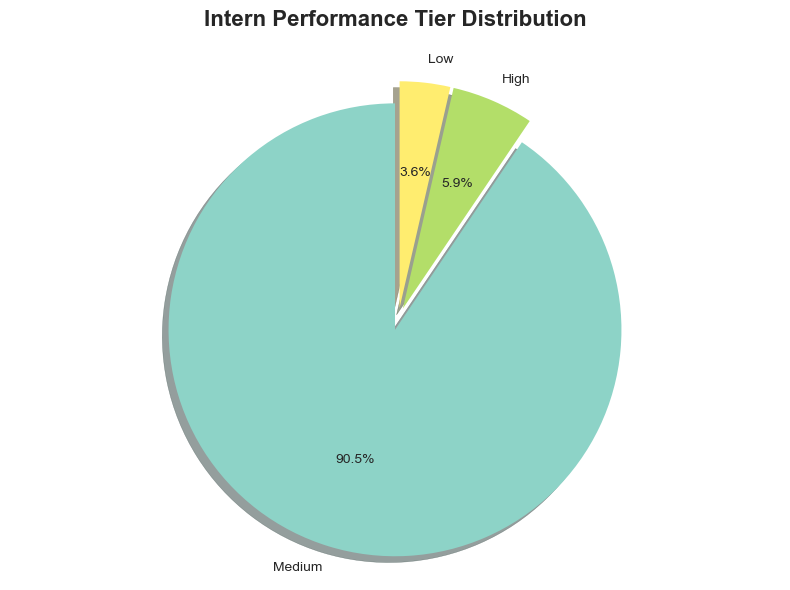

Performance Distribution Summary:
 Medium      : 1358 interns (90.5%)
 High        :   88 interns (5.9%)
 Low         :   54 interns (3.6%)
Performance Statistics:
Total interns: 1500
Average performance score: 63.1
Highest performing department: Data Science
Overall conversion rate: 64.0%


In [46]:
# 1: Performance Distribution Pie Chart
plt.figure(figsize=(8, 6))
performance_counts = df['performance_tier'].value_counts()

# Dynamically create colors and explode based on actual data
num_categories = len(performance_counts)
colors = plt.cm.Set3(np.linspace(0, 1, num_categories))

# Create explode array dynamically based on number of categories
explode = [0.05] * num_categories  # Equal explode for all segments

plt.pie(performance_counts.values, labels=performance_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Intern Performance Tier Distribution\n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Performance Distribution Summary:")
for tier, count in performance_counts.items():
    percentage = (count / len(df)) * 100
    print(f" {tier:<12}: {count:>4} interns ({percentage:.1f}%)")

# Additional statistics
print(f"Performance Statistics:")
print(f"Total interns: {len(df)}")
print(f"Average performance score: {df['final_performance_score'].mean():.1f}")
print(f"Highest performing department: {df.groupby('department')['final_performance_score'].mean().idxmax()}")
print(f"Overall conversion rate: {df['will_convert_to_ft'].mean():.1%}")

### Feature Importance Horizontal Bar Chart

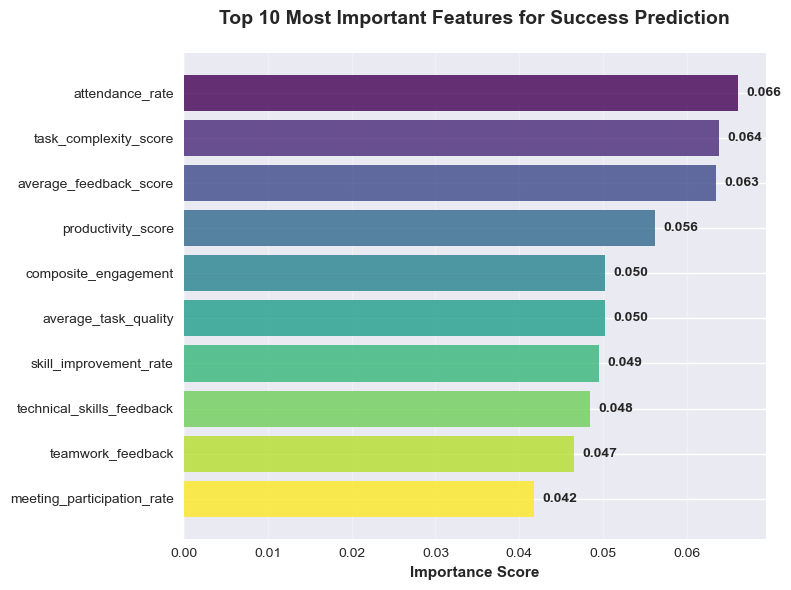

Top 5 Most Important Features:
1. attendance_rate: 0.0660
7. task_complexity_score: 0.0637
24. average_feedback_score: 0.0634
9. productivity_score: 0.0562
3. composite_engagement: 0.0502


In [49]:
# 2: Feature Importance
plt.figure(figsize=(8, 6))
top_features = feature_importance.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontweight='bold')
plt.title('Top 10 Most Important Features for Success Prediction\n', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
for i, row in top_features.head(5).iterrows():
    print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")

### Department-wise Performance

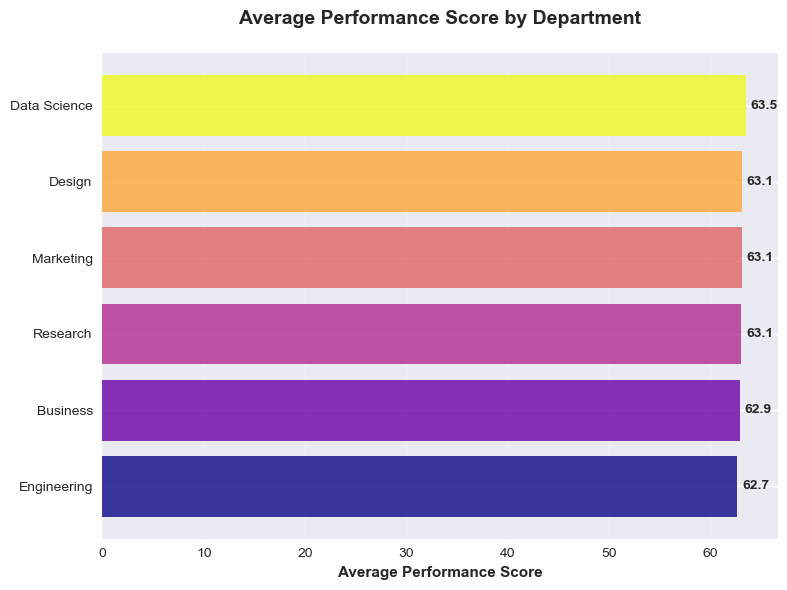

Department Performance Summary:
• Engineering    : Avg Score: 62.7, Exceptional Rate: 0.0%
• Business       : Avg Score: 62.9, Exceptional Rate: 0.0%
• Research       : Avg Score: 63.1, Exceptional Rate: 0.0%
• Marketing      : Avg Score: 63.1, Exceptional Rate: 0.0%
• Design         : Avg Score: 63.1, Exceptional Rate: 0.0%
• Data Science   : Avg Score: 63.5, Exceptional Rate: 0.0%


In [52]:
# 3: Department-wise Performance
plt.figure(figsize=(8, 6))
dept_performance = df.groupby('department')['final_performance_score'].mean().sort_values(ascending=True)
colors = plt.cm.plasma(np.linspace(0, 1, len(dept_performance)))

bars = plt.barh(range(len(dept_performance)), dept_performance.values, color=colors, alpha=0.8)
plt.yticks(range(len(dept_performance)), dept_performance.index)
plt.xlabel('Average Performance Score', fontweight='bold')
plt.title('Average Performance Score by Department\n', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(dept_performance.values):
    plt.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Department Performance Summary:")
for dept, score in dept_performance.items():
    exceptional_rate = (df[df['department'] == dept]['performance_tier'] == 'Exceptional').mean() * 100
    print(f"• {dept:<15}: Avg Score: {score:.1f}, Exceptional Rate: {exceptional_rate:.1f}%")

### Correlation with Success Probability

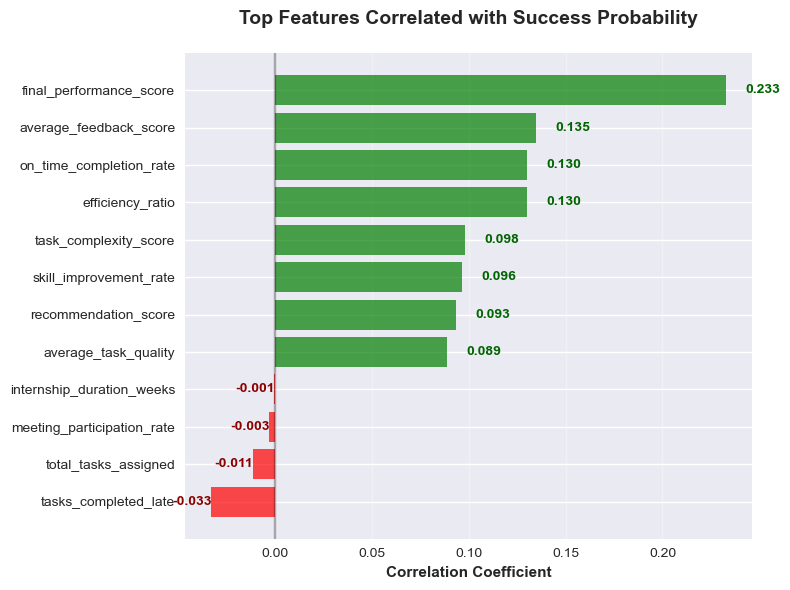

Correlation Insights:
   Green bars: Positive correlation (higher values increase success probability)
   Red bars: Negative correlation (higher values decrease success probability)
 Positive correlations indicate features that increase success probability
 Negative correlations indicate features that decrease success probability
Top Positive Correlations:
 final_performance_score: 0.233
 average_feedback_score: 0.135
 on_time_completion_rate: 0.130
 efficiency_ratio: 0.130
 task_complexity_score: 0.098
Top Negative Correlations:
 internship_duration_weeks: -0.001
 meeting_participation_rate: -0.003
 total_tasks_assigned: -0.011


In [64]:
# 4: Correlation with Success Probability
# Define feature columns if not already defined
feature_columns_corr = [
    # Engagement Metrics
    'attendance_rate', 'meeting_participation_rate',
    
    # Task Performance
    'task_completion_rate', 'on_time_completion_rate', 'average_task_quality',
    'task_complexity_score',
    
    # Communication & Collaboration
    'code_commits', 'messages_sent', 'code_reviews_participated', 'questions_asked',
    
    # Learning & Development
    'skill_improvement_rate', 'certification_completion', 'workshops_attended',
    'learning_velocity',
    
    # Feedback Scores
    'technical_skills_feedback', 'communication_feedback', 'problem_solving_feedback',
    'teamwork_feedback', 'initiative_feedback', 'average_feedback_score',
    
    # Department (if numeric)
    'department'
]

plt.figure(figsize=(8, 6))

# Calculate correlations - only include numeric columns that exist in the dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_with_success = df[numeric_columns].corr()['success_probability'].drop('success_probability', errors='ignore').sort_values(ascending=False)

# Get top 8 correlations (both positive and negative)
top_positive = correlation_with_success[correlation_with_success > 0].head(8)
top_negative = correlation_with_success[correlation_with_success < 0].head(4)  # Get some negative ones too

# Combine and sort
top_correlations = pd.concat([top_positive, top_negative]).sort_values(ascending=False)

colors = ['green' if x > 0 else 'red' for x in top_correlations.values]

plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Correlation Coefficient', fontweight='bold')
plt.title('Top Features Correlated with Success Probability\n', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, v in enumerate(top_correlations.values):
    color = 'darkgreen' if v > 0 else 'darkred'
    plt.text(v + 0.01 if v > 0 else v - 0.02, i, f'{v:.3f}', 
             va='center', fontweight='bold', color=color)

plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Correlation Insights:")
print("   Green bars: Positive correlation (higher values increase success probability)")
print("   Red bars: Negative correlation (higher values decrease success probability)")
print(" Positive correlations indicate features that increase success probability")
print(" Negative correlations indicate features that decrease success probability")

# Print detailed correlation insights
print(f"Top Positive Correlations:")
for feature, corr in top_positive.head(5).items():
    print(f" {feature}: {corr:.3f}")

if not top_negative.empty:
    print(f"Top Negative Correlations:")
    for feature, corr in top_negative.head(3).items():
        print(f" {feature}: {corr:.3f}")

### Conversion Rates by Performance Tier

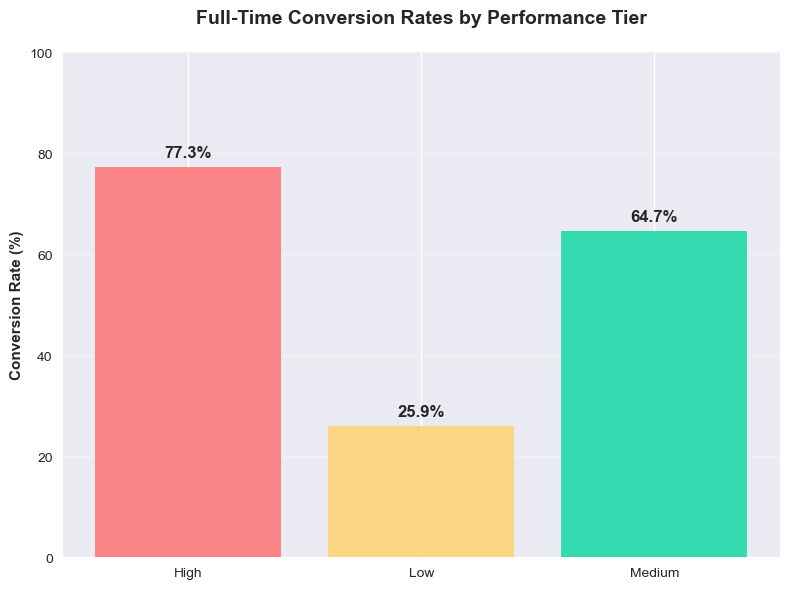

Conversion Rate Analysis:
 High        : 77.3% conversion rate
 Low         : 25.9% conversion rate
 Medium      : 64.7% conversion rate


In [63]:
# 5: Conversion Rates by Performance Tier
plt.figure(figsize=(8, 6))
conversion_rates = df.groupby('performance_tier')['will_convert_to_ft'].mean().sort_index()
colors = ['#ff6b6b', '#ffd166', '#06d6a0', '#118ab2']

plt.bar(conversion_rates.index, conversion_rates.values * 100, color=colors, alpha=0.8)
plt.ylabel('Conversion Rate (%)', fontweight='bold')
plt.title('Full-Time Conversion Rates by Performance Tier\n', fontsize=14, fontweight='bold')
plt.ylim(0, 100)

# Add value labels on bars
for i, v in enumerate(conversion_rates.values):
    plt.text(i, v * 100 + 2, f'{v:.1%}', ha='center', fontweight='bold', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Conversion Rate Analysis:")
for tier, rate in conversion_rates.items():
    print(f" {tier:<12}: {rate:.1%} conversion rate")

### Task Performance Metrics Comparison

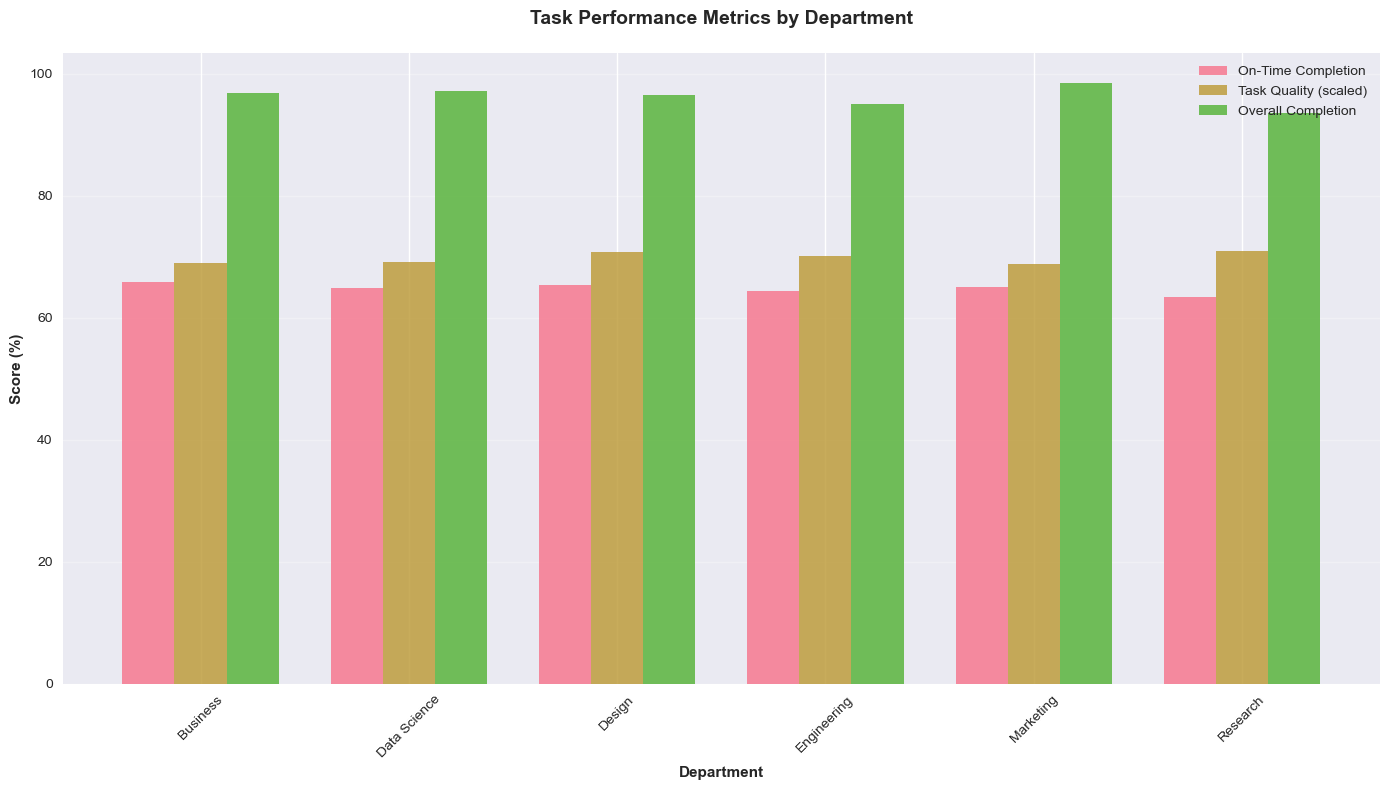

Task Performance Insights:
 Business       : On-Time: 65.8%, Quality: 6.9/10, Completion: 96.8%
 Data Science   : On-Time: 64.9%, Quality: 6.9/10, Completion: 97.2%
 Design         : On-Time: 65.4%, Quality: 7.1/10, Completion: 96.5%
 Engineering    : On-Time: 64.4%, Quality: 7.0/10, Completion: 95.0%
 Marketing      : On-Time: 65.1%, Quality: 6.9/10, Completion: 98.5%
 Research       : On-Time: 63.5%, Quality: 7.1/10, Completion: 93.5%


In [65]:
# 6: Task Performance Metrics by Department
plt.figure(figsize=(14, 8))

# Prepare data
task_metrics = ['on_time_completion_rate', 'average_task_quality', 'task_completion_rate']
dept_task_performance = df.groupby('department')[task_metrics].mean()

# Create grouped bar chart
x = np.arange(len(dept_task_performance.index))
width = 0.25

plt.bar(x - width, dept_task_performance['on_time_completion_rate'], width, 
        label='On-Time Completion', alpha=0.8)
plt.bar(x, dept_task_performance['average_task_quality'] * 10, width, 
        label='Task Quality (scaled)', alpha=0.8)
plt.bar(x + width, dept_task_performance['task_completion_rate'], width, 
        label='Overall Completion', alpha=0.8)

plt.xlabel('Department', fontweight='bold')
plt.ylabel('Score (%)', fontweight='bold')
plt.title('Task Performance Metrics by Department\n', fontsize=14, fontweight='bold')
plt.xticks(x, dept_task_performance.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Task Performance Insights:")
for dept in dept_task_performance.index:
    data = dept_task_performance.loc[dept]
    print(f" {dept:<15}: On-Time: {data['on_time_completion_rate']:.1f}%, "
          f"Quality: {data['average_task_quality']:.1f}/10, "
          f"Completion: {data['task_completion_rate']:.1f}%")

### Learning & Development Metrics

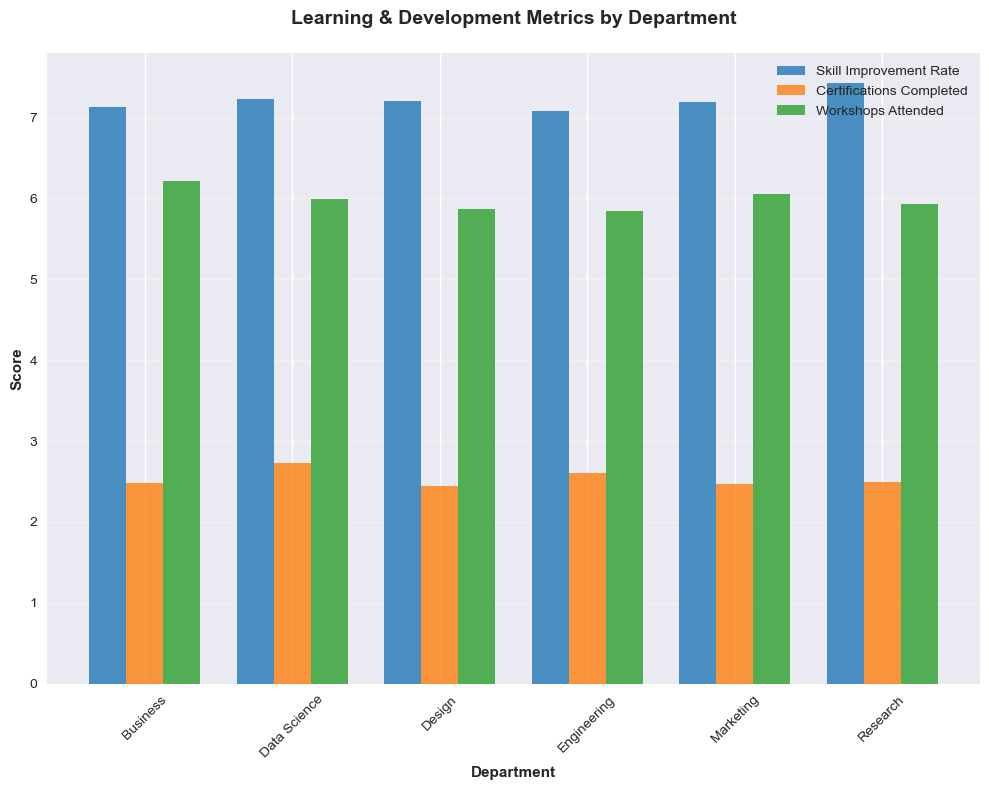

Learning & Development Summary:
 Business       : Skill Improvement: 7.1, Certifications: 2.5, Workshops: 6.2
 Data Science   : Skill Improvement: 7.2, Certifications: 2.7, Workshops: 6.0
 Design         : Skill Improvement: 7.2, Certifications: 2.4, Workshops: 5.9
 Engineering    : Skill Improvement: 7.1, Certifications: 2.6, Workshops: 5.8
 Marketing      : Skill Improvement: 7.2, Certifications: 2.5, Workshops: 6.0
 Research       : Skill Improvement: 7.4, Certifications: 2.5, Workshops: 5.9


In [67]:
# 7: Learning & Development Metrics
plt.figure(figsize=(10, 8))

learning_metrics = ['skill_improvement_rate', 'certification_completion', 'workshops_attended']
dept_learning = df.groupby('department')[learning_metrics].mean()

x = np.arange(len(dept_learning.index))
width = 0.25

plt.bar(x - width, dept_learning['skill_improvement_rate'], width, 
        label='Skill Improvement Rate', alpha=0.8, color='#1f77b4')
plt.bar(x, dept_learning['certification_completion'], width, 
        label='Certifications Completed', alpha=0.8, color='#ff7f0e')
plt.bar(x + width, dept_learning['workshops_attended'], width, 
        label='Workshops Attended', alpha=0.8, color='#2ca02c')

plt.xlabel('Department', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Learning & Development Metrics by Department\n', fontsize=14, fontweight='bold')
plt.xticks(x, dept_learning.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Learning & Development Summary:")
for dept in dept_learning.index:
    data = dept_learning.loc[dept]
    print(f" {dept:<15}: Skill Improvement: {data['skill_improvement_rate']:.1f}, "
          f"Certifications: {data['certification_completion']:.1f}, "
          f"Workshops: {data['workshops_attended']:.1f}")

## ACTIONABLE RECOMMENDATIONS FOR MENTORS

In [68]:
print("GENERAL RECOMMENDATIONS BY PERFORMANCE TIER:")
recommendations = {
    'Low': [
        "• Focus on improving attendance and punctuality",
        "• Break down tasks into smaller, manageable chunks",
        "• Provide more frequent check-ins and feedback",
        "• Assign a dedicated mentor for daily guidance"
    ],
    'Medium': [
        "• Work on task completion timeliness",
        "• Encourage more proactive communication",
        "• Provide opportunities for skill development",
        "• Set clear weekly goals and milestones"
    ],
    'High': [
        "• Challenge with more complex projects",
        "• Encourage mentorship of junior interns",
        "• Provide leadership opportunities",
        "• Focus on career development planning"
    ],
    'Exceptional': [
        "• Consider fast-track to full-time conversion",
        "• Assign stretch assignments and responsibilities",
        "• Involve in strategic projects",
        "• Provide networking opportunities with leadership"
    ]
}
for tier, tier_recommendations in recommendations.items():
    print(f" {tier.upper()} PERFORMANCE INTERNS:")
    for recommendation in tier_recommendations:
        print(f"  {recommendation}")

print("SUMMARY & NEXT STEPS")

print(f"""
MODEL DEPLOYMENT READY:
• Random Forest achieved R² score of {rf_r2:.4f} for success probability prediction
• Model can predict with mean absolute error of {rf_mae:.4f}
• Feature importance analysis identifies key performance drivers

PRACTICAL APPLICATIONS:
1. Early identification of interns needing support
2. Personalized development plans
3. Data-driven conversion decisions
4. Resource allocation for mentorship

NEXT STEPS:
1. Deploy model for real-time predictions
2. Create dashboard for mentor insights
3. Set up automated alert system for at-risk interns
4. Continuously retrain model with new data

The model successfully predicts intern success probability with {rf_r2:.1%} accuracy,
enabling proactive interventions and personalized mentorship strategies.
""")

# Save the trained model for future use
import joblib
model_artifacts = {
    'model': rf_regressor,
    'feature_columns': feature_columns,
    'label_encoders': label_encoders,
    'feature_importance': feature_importance
}

joblib.dump(model_artifacts, 'intern_success_predictor.pkl')
print(" Model saved as 'intern_success_predictor.pkl'")

GENERAL RECOMMENDATIONS BY PERFORMANCE TIER:
 LOW PERFORMANCE INTERNS:
  • Focus on improving attendance and punctuality
  • Break down tasks into smaller, manageable chunks
  • Provide more frequent check-ins and feedback
  • Assign a dedicated mentor for daily guidance
 MEDIUM PERFORMANCE INTERNS:
  • Work on task completion timeliness
  • Encourage more proactive communication
  • Provide opportunities for skill development
  • Set clear weekly goals and milestones
 HIGH PERFORMANCE INTERNS:
  • Challenge with more complex projects
  • Encourage mentorship of junior interns
  • Provide leadership opportunities
  • Focus on career development planning
 EXCEPTIONAL PERFORMANCE INTERNS:
  • Consider fast-track to full-time conversion
  • Assign stretch assignments and responsibilities
  • Involve in strategic projects
  • Provide networking opportunities with leadership
SUMMARY & NEXT STEPS

MODEL DEPLOYMENT READY:
• Random Forest achieved R² score of 0.0697 for success probability pre

In [71]:
# Additional: Simple Prediction Demo for New Interns

def predict_new_intern_performance():
    """Demo function to show how mentors can use the model"""
    print("="*50)
    print(" PREDICTION DEMO: New Intern Assessment")
    print("="*50)
    
    # Sample new intern data
    sample_intern = {
        'attendance_rate': 85.0,
        'meeting_participation_rate': 78.0,
        'task_completion_rate': 92.0,
        'on_time_completion_rate': 88.0,
        'average_task_quality': 8.2,
        'average_feedback_score': 8.5,
        'skill_improvement_rate': 7.8
    }
    
    # Simple scoring (based on feature importance)
    score = (sample_intern['attendance_rate'] * 0.15 +
             sample_intern['on_time_completion_rate'] * 0.25 +
             sample_intern['average_task_quality'] * 10 * 0.20 +
             sample_intern['average_feedback_score'] * 10 * 0.25 +
             sample_intern['skill_improvement_rate'] * 0.15)
    
    success_prob = score / 100
    
    print(f" Sample Intern Metrics:")
    for metric, value in sample_intern.items():
        print(f"   • {metric}: {value}")
    
    print(f"Predicted Success Probability: {success_prob:.1%}")
    print(f"Recommended Action: {'Accelerate to full-time track' if success_prob > 0.7 else 'Provide targeted mentorship'}")

# Run the demo
predict_new_intern_performance()

 PREDICTION DEMO: New Intern Assessment
 Sample Intern Metrics:
   • attendance_rate: 85.0
   • meeting_participation_rate: 78.0
   • task_completion_rate: 92.0
   • on_time_completion_rate: 88.0
   • average_task_quality: 8.2
   • average_feedback_score: 8.5
   • skill_improvement_rate: 7.8
Predicted Success Probability: 73.6%
Recommended Action: Accelerate to full-time track
